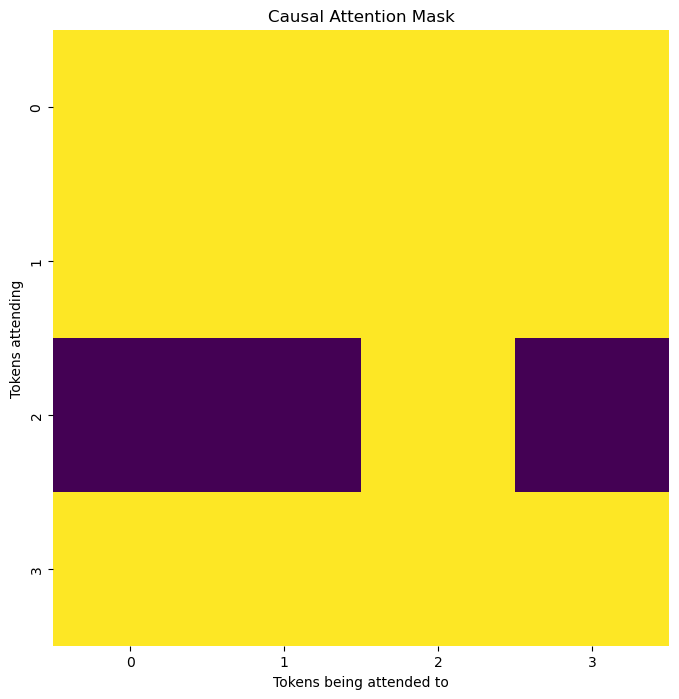

In [5]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns

class CustomAttentionModule:
    def __init__(self, mem_length, con_length):
        self.mem_length = mem_length
        self.con_length = con_length

    def causal_memory_mask(self):
        """
        Retains causality for context tokens and allows the latter half of them to attend to memory

        Memory tokens can attend to the former half of context tokens, but not to the latter half
        """
        M = self.mem_length
        C = self.con_length
        T = M + C

        mask = torch.zeros(T, T, dtype=torch.bool)
        
        # The latter half of context tokens can attend to memory tokens
        mask[M + T//2 - 1:, :M] = True # shift by 1 since tokens can attend to themselves

        # Memory tokens can attend to the former half of context tokens
        mask[:M, :M + T//2] = True
        
        # Context tokens can only attend to previous context tokens
        mask[M:, M:] = torch.tril(torch.ones(C, C, dtype=torch.bool))
        
        # Broadcast to the batch size and head dimensions
        mask = mask.view(1, 1, T, T)
        
        return mask

# Example Usage
mem_length = 2 # Memory length
con_length = 2  # Context length
module = CustomAttentionModule(mem_length, con_length)
mask = module.causal_memory_mask()

# Visualizing the mask
plt.figure(figsize=(10, 8))
sns.heatmap(mask[0, 0].numpy(), cmap="viridis", cbar=False, square=True)
plt.title("Causal Attention Mask")
plt.xlabel("Tokens being attended to")
plt.ylabel("Tokens attending")
plt.show()
